In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Jamboree_file.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Prepare the data
X = data.drop(columns=['Serial No.', 'Chance of Admit '])
y = data['Chance of Admit ']

In [5]:
# Split data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [6]:
X_train_full

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [7]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
421,321,112,3,3.0,4.5,8.95,1
250,320,104,3,3.0,2.5,8.57,1
247,311,104,2,2.5,3.5,8.48,0
26,322,109,5,4.5,3.5,8.80,0
198,311,104,3,4.5,4.5,8.43,0
...,...,...,...,...,...,...,...
157,309,104,2,2.0,2.5,8.26,0
228,318,112,3,4.0,3.5,8.67,0
27,298,98,2,1.5,2.5,7.50,1
480,321,102,3,3.5,4.0,9.01,1


In [8]:
X_val

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
120,335,117,5,5.0,5.0,9.56,1
128,326,112,3,3.5,3.0,9.10,1
271,299,96,2,1.5,2.0,7.86,0
349,313,101,3,2.5,3.0,8.04,0
272,294,95,1,1.5,1.5,7.64,0
...,...,...,...,...,...,...,...
190,324,111,5,4.5,4.0,9.16,1
385,335,117,5,5.0,5.0,9.82,1
130,339,114,5,4.0,4.5,9.76,1
95,304,100,4,1.5,2.5,7.84,0


In [9]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [10]:
# Define a pipeline with Polynomial Features, feature scaling, and Ridge/Lasso regression
pipeline = Pipeline([
                    ('polynomial', PolynomialFeatures()),
                    ('scaler', StandardScaler()),
                    ('regressor', Ridge())  # Placeholder for Ridge or Lasso
])

In [15]:
# Define hyperparameter grid for both Ridge and Lasso regression with polynomial features
param_grid = [
    {
        'polynomial__degree': [2,3,4,5],  # Degrees of polynomial features
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1, 10, 100]  # Regularization strength for Ridge
    },
    {
        'polynomial__degree': [2,3,4,5],
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1, 10, 100]  # Regularization strength for Lasso
    }
]

In [19]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             param_grid=[{'polynomial__degree': [2, 3, 4, 5],
                          'regressor': [Ridge(alpha=1)],
                          'regressor__alpha': [0.1, 1, 10, 100]},
                         {'polynomial__degree': [2, 3, 4, 5],
                          'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 1, 10, 100]}],
             scoring='r2')

In [20]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('regressor', Ridge(alpha=1))])

In [21]:
best_model

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('regressor', Ridge(alpha=1))])

In [22]:
# Evaluate the best model on validation set
val_score = best_model.score(X_val, y_val)
val_score

0.8509933747430578

In [23]:
# Perform k-fold cross-validation
kfold_scores = cross_val_score(best_model, X_train_full, y_train_full, cv=5, scoring='r2')
kfold_scores

array([0.82502422, 0.71830193, 0.82169603, 0.79270888, 0.87625815])

In [24]:
# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_mse,test_r2

(0.0035505717467707067, 0.826377909693364)

In [25]:
# Display results
print("Validation R^2 Score:", val_score)
print("Cross-Validation R^2 Scores:", kfold_scores)
print("Mean Cross-Validation R^2 Score:", kfold_scores.mean())
print("Test Mean Squared Error (MSE):", test_mse)
print("Test R^2 Score:", test_r2)
print("Best Parameters:", grid_search.best_params_)

Validation R^2 Score: 0.8509933747430578
Cross-Validation R^2 Scores: [0.82502422 0.71830193 0.82169603 0.79270888 0.87625815]
Mean Cross-Validation R^2 Score: 0.806797843014899
Test Mean Squared Error (MSE): 0.0035505717467707067
Test R^2 Score: 0.826377909693364
Best Parameters: {'polynomial__degree': 2, 'regressor': Ridge(alpha=1), 'regressor__alpha': 1}


In [26]:
residuals = y_test.values-y_pred_test

In [27]:
from scipy.stats import shapiro # Test for Normality.
shapiro(residuals)

ShapiroResult(statistic=0.9239988327026367, pvalue=2.3087279259925708e-05)

In [28]:
if shapiro(residuals)[1] <= 0.05:
    print('Ha(Rejected): Sample is not from the normal distributions.')
else:
    print('Ho(Accepted): Sample is from the normal distributions.(Po>0.05)')

Ha(Rejected): Sample is not from the normal distributions.


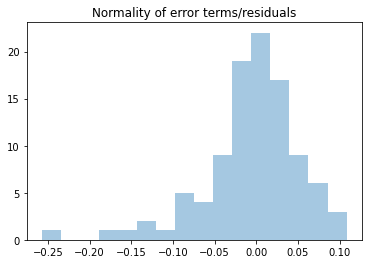

In [29]:
p = sns.distplot(residuals,kde=False)
p = plt.title('Normality of error terms/residuals')

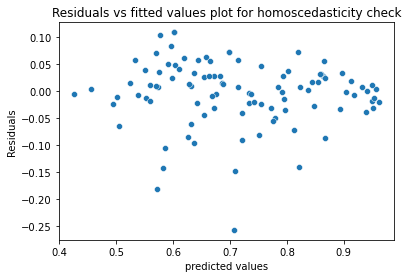

In [31]:
p = sns.scatterplot(x=y_pred_test,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
#plt.ylim(-0.4,0.4)
#plt.xlim(0,1)
#p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.5315216358025944), ('p-value', 0.9794987880919171)]

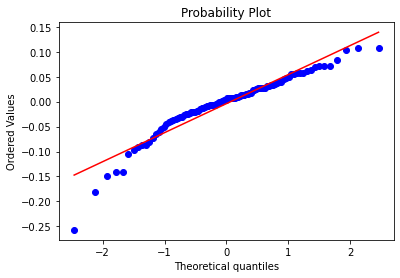

In [34]:
import scipy.stats as stats

residuals = y_test - y_pred_test
stats.probplot(residuals, dist='norm', plot=plt)
plt.show()